<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

<h1><center>Assignment #1. Fall 2018</center></h1>
<h2><center>Exploratory data analysis of Olympic games with Pandas</center></h2>

__There are ten questions about [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2) dataset in this task. Your task is to fill in the missing Python code and choose answers in [this web-form](https://docs.google.com/forms/d/179HYvlF_0x435CWdu2aOtR9a3flh0YCQXXNXhXaKw2M).__

Download the file `athlete_events.csv` from [Kaggle page](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The dataset has the following features (copied from Kaggle):

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change the path to the dataset file if needed. 
PATH = '../../data/athlete_events.csv'

In [6]:
data = pd.read_csv(PATH)
data.head()
#data['Sport'].value_counts()
#data.info()
#data['Team'].value_counts()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. How old were the youngest male and female participants of the 1996 Olympics?__

- 16 and 15
- 14 and 12 
- 16 and 12
- 13 and 11

In [21]:
print('Min male age: {} \nMin female age: {}'.format(data[(data['Sex']=='M')&(data['Year']==1996)]['Age'].min(),\
                                                     data[(data['Sex']=='F')&(data['Year']==1996)]['Age'].min()))

Min male age: 14.0 
Min female age: 12.0


__2. What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Round the answer to the first decimal.__

*Hint:* here and further if needed drop duplicated sportsmen to count only unique ones. 

- 0.2
- 1.5 
- 2.5
- 7.7

In [37]:
tMale = data[(data['Year']==2000)&(data['Sex']=='M')].drop_duplicates(subset=['Name'])['Name'].count()
gymMale = data[(data['Year']==2000)&(data['Sex']=='M')&(data['Sport']=='Gymnastics')].drop_duplicates(subset=['Name'])['Name'].count()

100*gymMale/tMale

## SCRATCH WORK
#(data['Year']==2000)&(data['Sex']=='M')

#data[(data['Sport']=='Gymnastics') & (data['Sex']=='M') & (data['Year'] == 2000)].describe(include = ['object'])
#pd.crosstab(data[(data['Year']==2000)&(data['Sex']=='M')]['Name'], 'Gymnastics', normalize = True)

## ONE LINE
#data[(data['Year']==2000)&(data['Sex']=='M')&(data['Sport']=='Gymnastics')].drop_duplicates(subset=['Name'])['Sport'].count()\
#/data[(data['Year']==2000)&(data['Sex']=='M')].drop_duplicates(subset=['Name'])['Sport'].count()*100

1.4750608272506083

__3. What are the mean and standard deviation of height for female basketball players participated in the 2000 Olympics? Round the answer to the first decimal.__

- 178.5 and 7.2
- 179.4 and 10
- 180.7 and 6.7
- 182.4 and 9.1 

In [51]:
data[(data['Sex']=='F')&(data['Year']==2000)&(data['Sport']=='Basketball')].drop_duplicates(subset=['Name'])['Height'].describe()

## SCRATCH WORK
# data[(data['Year']==2000)&(data['Sex']=='F')&(data['Sport']=='Basketball')].drop_duplicates(subset=['Name'])\
# .groupby(['Sex'])['Height'].describe()

count    142.000000
mean     182.387324
std        9.139462
min      162.000000
25%      175.000000
50%      182.000000
75%      190.000000
max      213.000000
Name: Height, dtype: float64

__4. Find a sportsperson participated in the 2002 Olympics, with the highest weight among other participants of the same Olympics. What sport did he or she do?__

- Judo
- Bobsleigh 
- Weightlifting
- Boxing

In [62]:
data.loc[data[data['Year']==2002]['Weight'].idxmax(),'Sport']

## SCRATCH WORK
# data.loc[data[data['Year']==2002]['Weight'].idxmax()]
# data[(data['Weight']==data[(data['Year']==2002)]['Weight'].max())&(data['Year']==2002)]['Sport']

#data[data['Year']==2002].groupby(['Sport'])['Weight'].max()

'Bobsleigh'

__5. How many times did Pawe Abratkiewicz participate in the Olympics held in different years?__

- 0
- 1 
- 2
- 3 

In [66]:
data[(data['Name']=='Pawe Abratkiewicz')]['Year'].drop_duplicates().count()

#data[data['Name']=='Pawe Abratkiewicz']['Year'].value_counts(dropna=False)
#data[data['Name']=='Pawe Abratkiewicz']['Year'].drop_duplicates().count()

3

__6. How many silver medals in tennis did Australia win at the 2000 Olympics?__

- 0
- 1 
- 2 
- 3 

In [71]:
data[(data['Team']=='Australia')&(data['Year']==2000)&(data['Medal']=='Silver')&(data['Sport']=='Tennis')]['Medal'].count()

#data[(data['Team']=='Australia')&(data['Year']==2000)&(data['Sport']=='Tennis')]['Medal'].value_counts()

2

__7. Is it true that Switzerland won fewer medals than Serbia at the 2016 Olympics? Do not consider NaN values in _Medal_ column.__ 

- Yes 
- No

In [77]:
Swiss = data[(data['Team']=='Switzerland')&(data['Year']==2016)]['Medal'].count()
Serbia = data[(data['Team']=='Serbia')&(data['Year']==2016)]['Medal'].count()

Swiss<Serbia

# data[(data['Team']=='Switzerland')&(data['Year']==2016)]['Medal'].count()<\
# data[(data['Team']=='Serbia')&(data['Year']==2016)]['Medal'].count()

54

__8. What age category did the fewest and the most participants of the 2014 Olympics belong to?__
- [45-55] and [25-35) correspondingly
- [45-55] and [15-25) correspondingly
- [35-45] and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

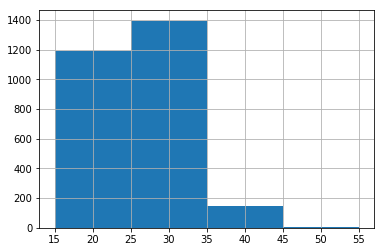

In [86]:
data[(data['Year']==2014)].drop_duplicates(subset=['Name'])['Age'].hist(bins=[15,25,35,45,55])

## SCRATCH WORK
#data[(data['Year']==2014)].sort_values('Age', ascending=True).drop_duplicates(subset=['Name'])['Age'].hist(alpha = 0.4, bins = [15,25,35,45,55])

#sns.distplot(pd.DataFrame(data[(data['Year']==2014)].sort_values('Age', ascending=True).drop_duplicates(subset=['Name'])['Age']), bins= [15,25,35,45,55])



__9. Is it true that there were Summer Olympics held in Lake Placid? Is it true that there were Winter Olympics held in Sankt Moritz?__

- Yes, Yes
- Yes, No
- No, Yes 
- No, No 

In [87]:
placid = data[(data['City']=="Lake Placid")&(data['Season']=='Summer')]['Year'].count()>0
moritz = data[(data['City']=='Sankt Moritz')&(data['Season']=='Winter')]['Year'].count()>0

print('Summer Olympics in Lake Place? {} \nWinter Olympics in Sankt Moritz? {}'.format(placid,moritz))

#print('Summer Olympics in Lake Placid: {} \nWinter Olypmics in Sankt Moritz: {}'.format(placid,moritz))

Summer Olympics in Lake Place? False 
Winter Olympics in Sankt Moritz? True


__10. What is the absolute difference between the number of unique sports at the 1995 Olympics and 2016 Olympics?__

- 16
- 24
- 26
- 34

In [92]:
data[(data['Year']==2016)]['Sport'].nunique()-data[(data['Year']==1995)]['Sport'].nunique()

#data[data['Year']==2016]['Sport'].dropna().nunique()-data[data['Year']==1995]['Sport'].dropna().nunique()

34